In [1]:
import torch
from torch.utils.data import DataLoader

from src.dataset.en_vi_dataset import EN_VIDataset
from src.models.model import Transformer
from src.utils.utils import input_target_collate_fn

import matplotlib.pyplot as plt
import traceback
import numpy as np
from scipy.spatial import distance

In [2]:
dev = 'cpu'

In [3]:
pretrained_path = 'weights/Transformer-En2Vi-CPE-WordPiece/best_bleu.pth'
config = torch.load(pretrained_path, map_location=dev)

In [4]:
token_type = config['config']['dataset']['train']
token_type = token_type.get(
    'config', {'token_type': 'bpe'}).get('token_type', 'bpe')
data_cfg = {
    'src_path': 'data/en-vi/raw-data/test/tst2013.en',
    'trg_path': 'data/en-vi/raw-data/test/tst2013.vi',
}
if token_type == 'bpe':
    data_cfg.update({
        'token_type': 'bpe',
        'src_vocab': ["vocab/english_bpe/en-bpe-minfreq5-vocab.json",
                      "vocab/english_bpe/en-bpe-minfreq5-merges.txt"],
        'trg_vocab': ["vocab/vietnamese_bpe/vi-bpe-minfreq5-vocab.json",
                      "vocab/vietnamese_bpe/vi-bpe-minfreq5-merges.txt"],
        # src_vocab: ["vocab/shared/shared-vocab.json", "vocab/shared/shared-merges.txt"]
        # trg_vocab: ["vocab/shared/shared-vocab.json", "vocab/shared/shared-merges.txt"]
    })
elif token_type == 'wordpiece':
    data_cfg.update({
        'token_type': 'wordpiece',
        'src_vocab': 'vocab/english_word/en-wordpiece-minfreq5-vocab.txt',
        'trg_vocab': 'vocab/vietnamese_word/vi-wordpiece-minfreq5-vocab.txt',
    })
ds = EN_VIDataset(**data_cfg)
dl = DataLoader(ds, batch_size=2,
                collate_fn=input_target_collate_fn)

In [5]:
model = Transformer(
    n_src_vocab=ds.en_tokenizer.get_vocab_size(),
    n_trg_vocab=ds.vi_tokenizer.get_vocab_size(),
    src_pad_idx=ds.en_tokenizer.token_to_id('<pad>'),
    trg_pad_idx=ds.vi_tokenizer.token_to_id('<pad>'),
    **config['config']['model']
).to(dev)
model.load_state_dict(config['model_state_dict'])
model.eval()
print()

In [6]:
em_freq_emb = model.enc_emb.freq_emb.weight.detach().numpy()

In [7]:
abs_mean_em_freq = np.absolute(em_freq_emb).mean(-1)

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.6470e+03, 2.1139e+04, 2.9790e+03]),
 array([0.        , 0.09379594, 0.18759188, 0.28138784, 0.37518376,
        0.46897972, 0.5627757 , 0.6565716 , 0.7503675 , 0.8441635 ,
        0.93795943], dtype=float32),
 <BarContainer object of 10 artists>)

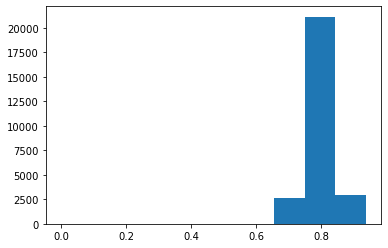

In [8]:
plt.hist(abs_mean_em_freq)

In [9]:
for t in abs_mean_em_freq.argsort()[:50]:
    print(ds.en_tokenizer.id_to_token(t))

<pad>
commentary
shru
albe
##ft
Arabic
##mark
frankly
country
Companies
mathematicians
incons
bal
##arial
maze
Gord
teem
alt
mart
gambling
sinking
fo
doors
Om
##kay
accused
##encia
Sec
phases
Rand
São
knuck
therein
Lau
minut
et
Anne
##alm
irrelevant
marijuana
##tan
audit
today
abusive
vari
##eah
Ident
voila
disappeared
12th


In [10]:
for t in abs_mean_em_freq.argsort()[-50:]:
    print(ds.en_tokenizer.id_to_token(t))

Dad
##ravel
ham
distinguish
wheelchair
##aving
Ple
zone
AK
paraph
portrayed
##DF
bonus
Maui
ability
##stan
rock
Spr
Pian
crowdsourcing
presumably
biologically
Kant
arter
dependencies
degrad
imagination
##bit
couldn
##leep
sprinting
anth
activities
printer
##amp
arose
##erness
visiting
names
stranded
grandfathers
lifeless
Tan
standard
imper
sad
melts
ineffect
vocabulary
spraying
